Setup

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn import linear_model
#from plotly import tools
import numpy.random as r
#import plotly.plotly as py
#import plotly.graph_obj as go
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
%matplotlib inline

In [2]:
df = pd.read_csv("qudditch_training.csv")
df.drop(["id","player_id","weight","foul_type_id","game_move_id","penalty_id","player_code","move_speciality","snitchnip",
         "checking","dopplebeater_defence","hawkshead_attacking_formation","no_hands_tackle","power_play","spiral_dive",
         "starfish_and_stick","twirl","wronski_feint","zig-zag","bludger_backbeat","chelmondiston_charge",
         "dionysus_dive","double_eight_loop","finbourgh_flick","parkins_pincer","plumpton_pass","porskoff_ploy",
         "transylvanian_tackle","woollongong_shimmy"],axis=1,inplace=True)
df = (df[~pd.isnull(df).any(axis=1)])

In [3]:
Xlabels=['age', 'game_duration', 'num_game_moves',
       'num_game_losses', 'num_practice_sessions', 'num_games_satout',
       'num_games_injured', 'num_games_notpartof',
       'num_games_won', 'stooging', 'body_blow', 'sloth_grip_roll',
       'reverse_pass', 'change', 'snitch_caught',
       'gryffindor','hufflepuff','ravenclaw','slytherin','female','male',
       'beater','chaser','seeker']

In [5]:
print(df.columns)
data = df.values
X1 = data[0:101267] # This leaves 101265 entries.

Y = data[:,-1]

#Y1 = Y1=='YES'
for i in range(len(Y)):
    if Y[i]=="NO":
        Y[i]=0.0
    elif Y[i]=="YES":
        Y[i]=1.0
        
Y=Y.astype('float')

#Y = Y.reshape((Y.shape[0],1))

gryffindor = np.zeros((X1.shape[0],1),dtype='float')
hufflepuff = np.zeros((X1.shape[0],1),dtype='float')
ravenclaw = np.zeros((X1.shape[0],1),dtype='float')
slytherin = np.zeros((X1.shape[0],1),dtype='float')

female = np.zeros((X1.shape[0],1))
male = np.zeros((X1.shape[0],1))

beater = np.zeros((X1.shape[0],1))
chaser = np.zeros((X1.shape[0],1))
seeker = np.zeros((X1.shape[0],1))

print(X1[0])

for row in range(len(X1)):
    if X1[row][0]=="Gryffindor":
        gryffindor[row]=1.0
    elif X1[row][0]=="Hufflepuff":
        hufflepuff[row]=1.0
    elif X1[row][0]=="Ravenclaw":
        ravenclaw[row]=1.0
    elif X1[row][0]=="Slytherin":
        slytherin[row]=1.0
        
    if X1[row][1]=="Female":
        female[row]=1.0
    elif X1[row][1]=="Male":
        male[row]=1.0
        
#    if X1[row][7]=="?":
#        X1[row][7]=0;
#    else:
#        X1[row][7]=float(X1[row][7])

    if X1[row][10]=="Beater":
        beater[row]=1.0
    elif X1[row][10]=="Chaser":
        chaser[row]=1.0
    elif X1[row][10]=="Seeker":
        seeker[row]=1.0
        
    if X1[row][12]=="Norm":
        X1[row][12]=1.0
    elif X1[row][12]==">7":
        X1[row][12]=2.0
    elif X1[row][12]==">8":
        X1[row][12]=3.0
    elif X1[row][12]=="None":
        X1[row][12]=0.0
    
    if X1[row][13]=="No":
        X1[row][13]=0.0
    elif X1[row][13]=="Down":
        X1[row][13]=1.0
    elif X1[row][13]=="Steady":
        X1[row][13]=2.0
    elif X1[row][13]=="Up":
        X1[row][13]=3.0
        
    if X1[row][14]=="No":
        X1[row][14]=0.0
    elif X1[row][14]=="Down":
        X1[row][14]=1.0
    elif X1[row][14]=="Steady":
        X1[row][14]=2.0
    elif X1[row][14]=="Up":
        X1[row][14]=3.0
        
    if X1[row][15]=="No":
        X1[row][15]=0.0
    elif X1[row][15]=="Down":
        X1[row][15]=1.0
    elif X1[row][15]=="Steady":
        X1[row][15]=2.0
    elif X1[row][15]=="Up":
        X1[row][15]=3.0
        
    if X1[row][-2]=="No":
        X1[row][-2]=0.0
    elif X1[row][-2]=="Yes":
        X1[row][-2]=1.0

    if X1[row][-3]=="No":
        X1[row][-3]=0.0
    elif X1[row][-3]=="Ch":
        X1[row][-3]=1.0
        
print(df.columns[18])
#X1[:,-2] = X1[:,-2]=="Yes"
#X1[:,-3] = X1[:,-3]=="Ch"

print(X1[0])

X1 = np.hstack((X1,gryffindor,hufflepuff,ravenclaw,slytherin,female,male,beater,chaser,seeker))
#X1: [
#0'house', 
#1'gender', 
#2'age', 
#3'game_duration', 
#4'num_game_moves',
#5'num_game_losses',
#6'num_practice_sessions',
#7'num_games_satout',
#8'num_games_injured',
#9'num_games_notpartof',
#10'player_type',
#11'num_games_won',
#12'stooging',
#13'body_blow',
#14'sloth_grip_roll',
#15'reverse_pass',
#16'change',
#17'snitch_caught',
#    'quidditch_league_player'?
#18'gryffindor',
#19'hufflepuff',
#20'ravenclaw',
#21'slytherin',
#22'female',
#23'male',
#24'beater',
#25'chaser',
#26'seeker']
X = np.delete(X1,[0,1,10,18],1)

Xlables=['age', 'game_duration', 'num_game_moves',
       'num_game_losses', 'num_practice_sessions', 'num_games_satout',
       'num_games_injured', 'num_games_notpartof',
       'num_games_won', 'stooging', 'body_blow', 'sloth_grip_roll',
       'reverse_pass', 'change', 'snitch_caught',
       'gryffindor','hufflepuff','ravenclaw','slytherin','female','male',
       'beater','chaser','seeker']

row_num = 1
column_num = 1
for row in X:
    for column in row:
        if type(column) != float:
            #print("DING!")
            continue
            #print("row=" + str(row_num) + "," + " column=" + str(column_num) + " data= ")
            #print(str(column) + " not float but ")
            #column = float(column)
            #print("now the val is of type: " + str(type(column)) + "\n")
        column_num += 1
    row_num += 1

X=X.astype('float')
    
print((X[0:20]))
print(Y[0:20])


#print(X[0:20,-6:-2])

#print(X[0:20,-2:])

Index(['house', 'gender', 'age', 'game_duration', 'num_game_moves',
       'num_game_losses', 'num_practice_sessions', 'num_games_satout',
       'num_games_injured', 'num_games_notpartof', 'player_type',
       'num_games_won', 'stooging', 'body_blow', 'sloth_grip_roll',
       'reverse_pass', 'change', 'snitch_caught', 'quidditch_league_player'],
      dtype='object')
['Gryffindor' 'Female' 11.0 1 41 0 1 0 0 0 'Beater' 1 'None' 'No' 'No'
 'No' 'No' 'No' 0.0]
quidditch_league_player
['Gryffindor' 'Female' 11.0 1 41 0 1 0 0 0 'Beater' 1 0.0 0.0 0.0 0.0 0.0
 0.0 0.0]
[[11.   1.  41.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   1.   0.   0.   0.   1.   0.   1.   0.   0. ]
 [12.   3.  59.   0.  18.   0.   0.   0.   9.   0.   0.   0.   3.   1.
   1.   1.   0.   0.   0.   1.   0.   1.   0.   0. ]
 [13.   2.  11.   5.  13.   2.   0.   1.   6.   0.   0.   2.   0.   0.
   1.   0.   0.   0.   1.   1.   0.   0.   0.   0. ]
 [14.   2.  44.   1.  16.   0.   0.   0.   7.   0.   0.

In [6]:
X_scale = preprocessing.scale(X)

In [7]:
Xp=preprocessing.PolynomialFeatures(degree=2)

In [8]:
djissjinc=preprocessing.scale(Y)

In [9]:
print(djissjinc)

[-0.92449372  1.08167311 -0.92449372 ... -0.92449372 -0.92449372
 -0.92449372]


In [10]:
trainX,testX,trainY,testY=train_test_split(X_scale,Y,test_size=0.3)

In [11]:

trainXpoly=Xp.fit_transform(trainX)
testXpoly=Xp.fit_transform(testX)
print(len(trainX[0]))
print(len(trainXpoly[0]))

24
325


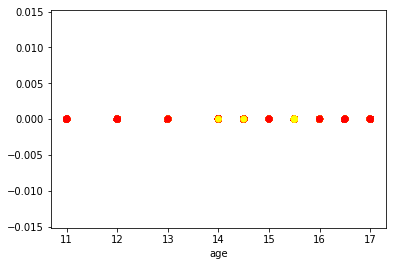

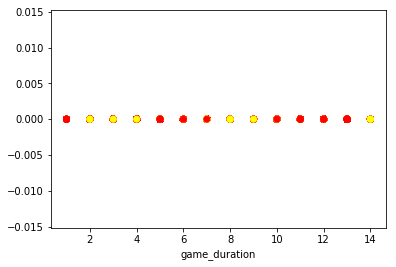

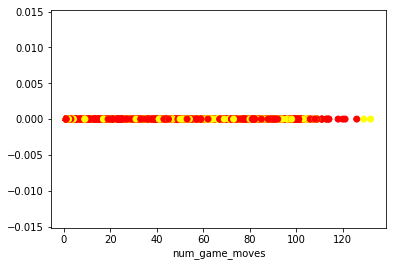

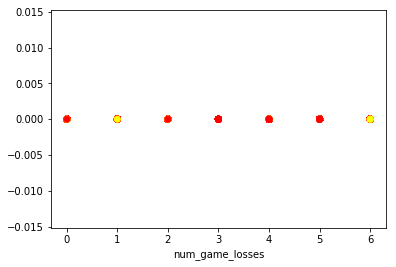

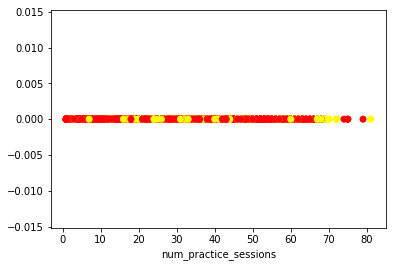

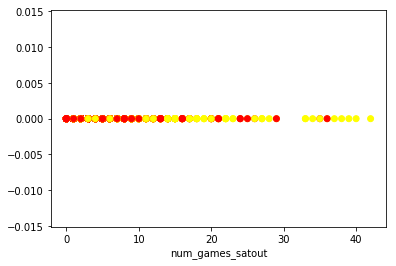

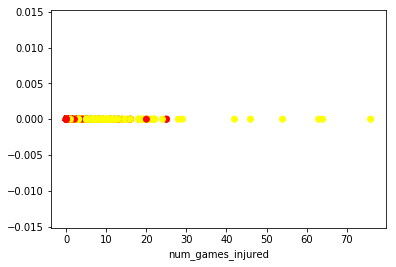

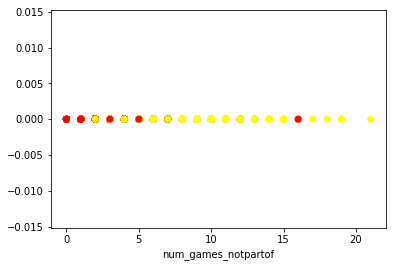

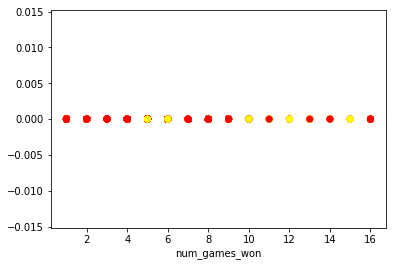

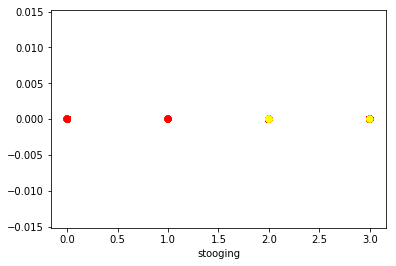

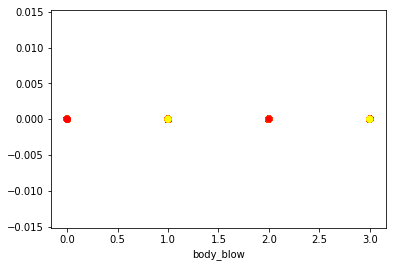

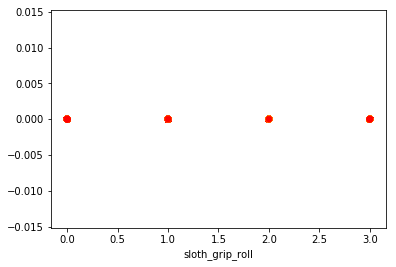

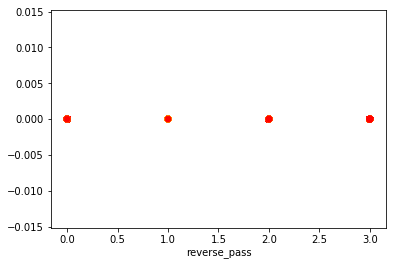

KeyboardInterrupt: 

In [12]:
# Unsupervised Analysis
# Plot every x parameter with y

for i in range(24):
    #fig=plt.subplot(24,1,i+1)
    plt.xlabel(Xlabels[i])
    plt.scatter(X[:,i],len(X)*[0],c=Y,cmap="autumn")
    plt.show()

# We gotta change this so that every pair of features are plotted in subplots.

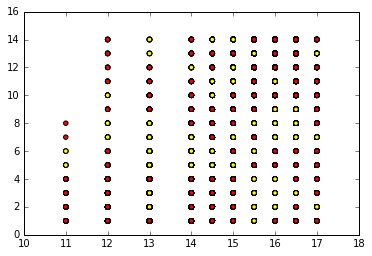

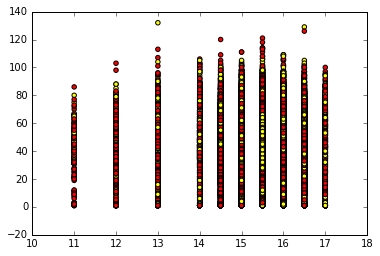

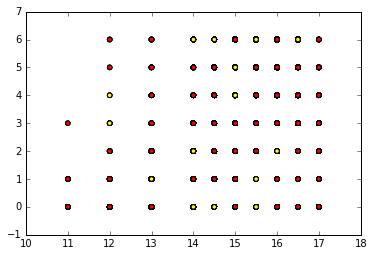

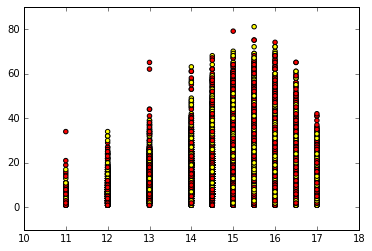

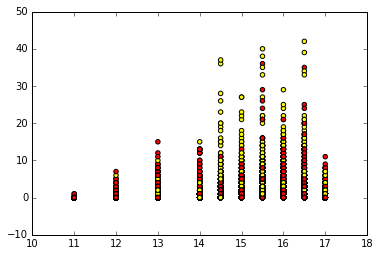

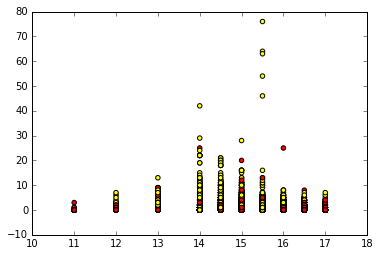

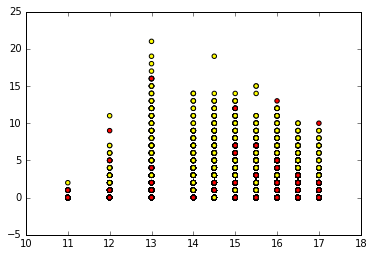

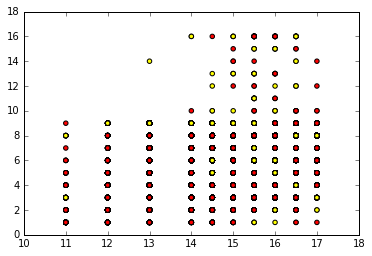

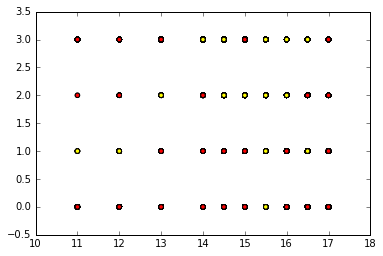

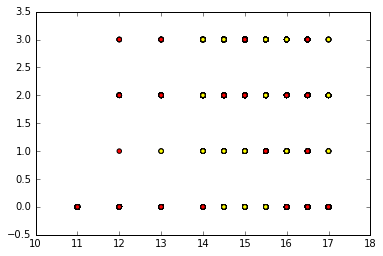

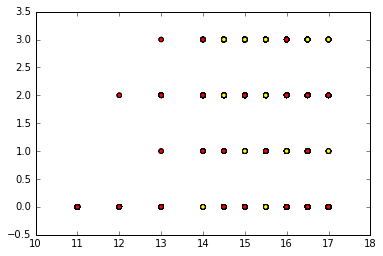

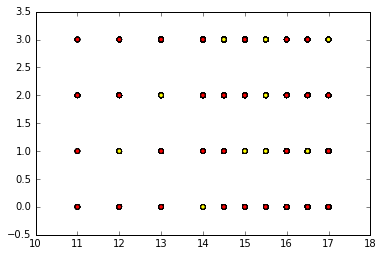

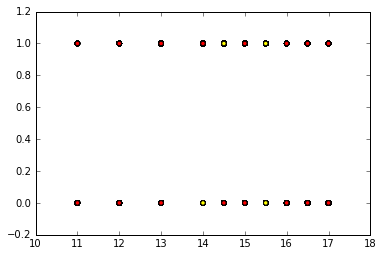

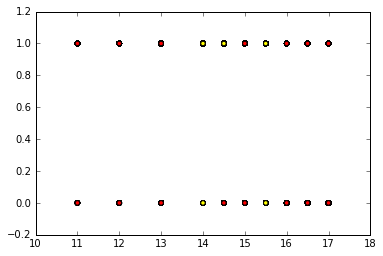

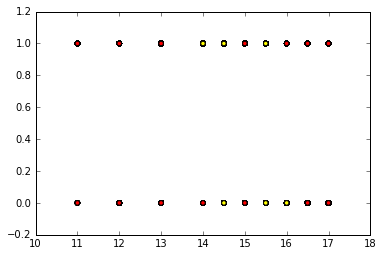

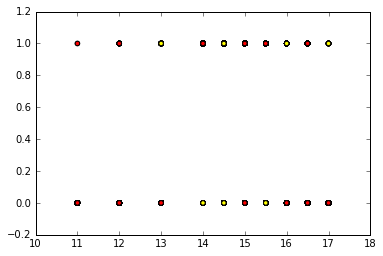

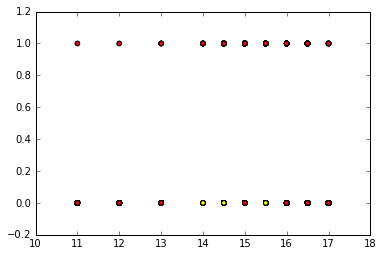

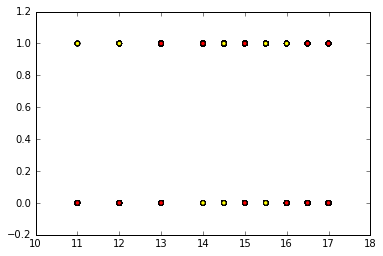

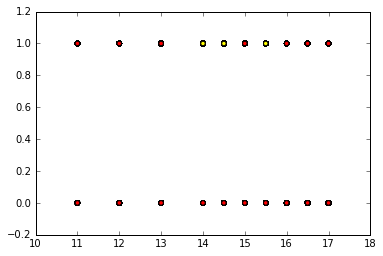

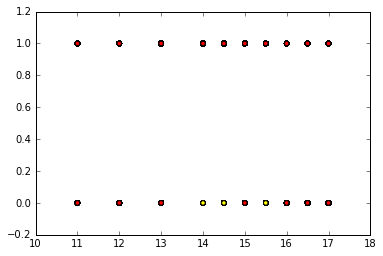

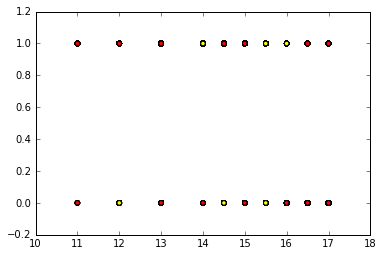

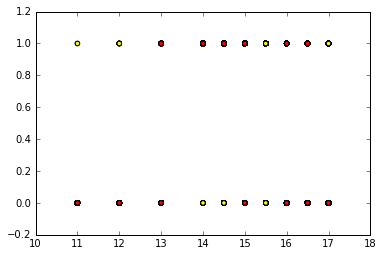

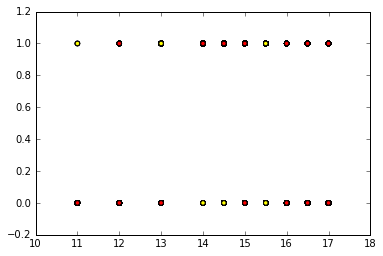

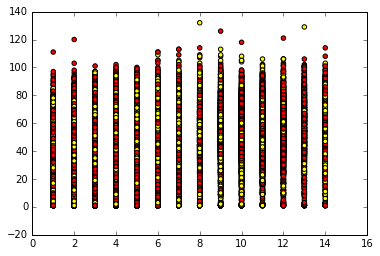

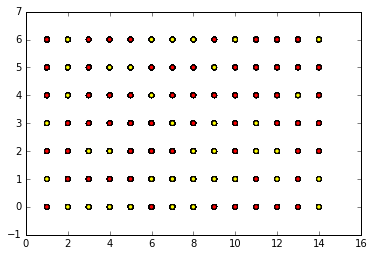

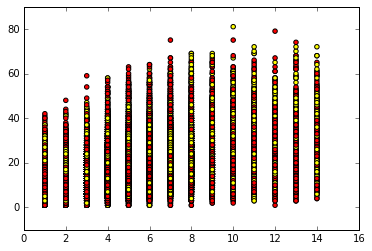

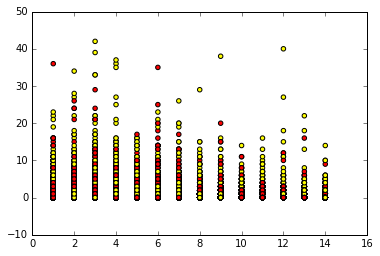

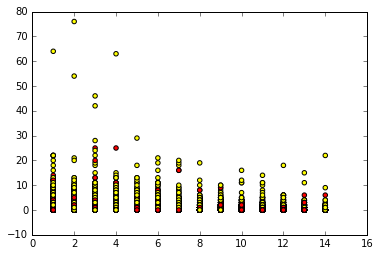

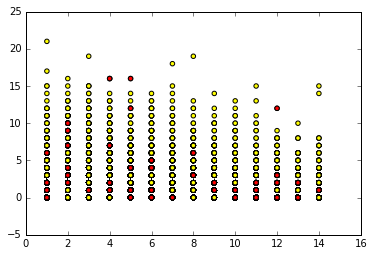

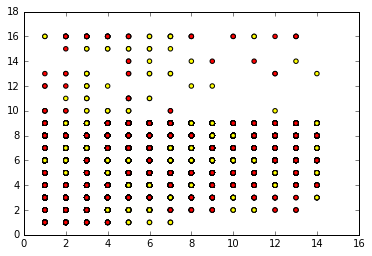

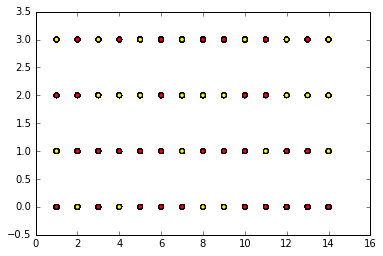

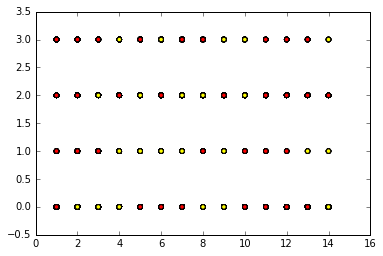

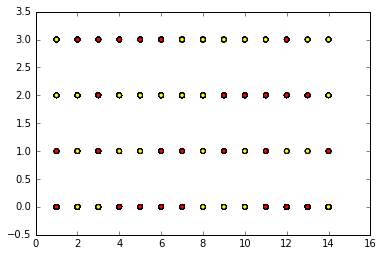

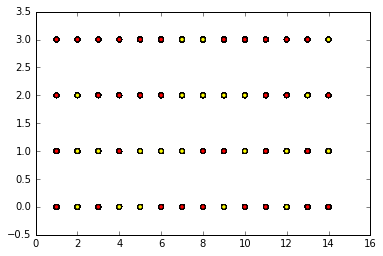

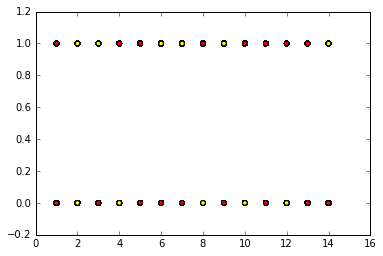

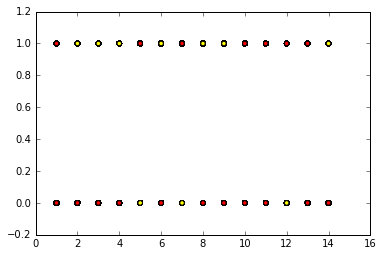

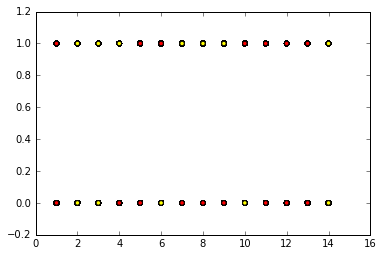

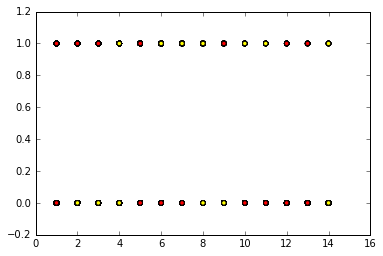

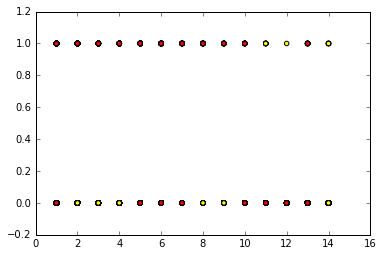

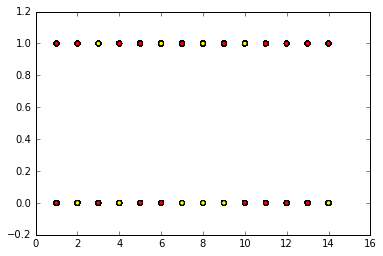

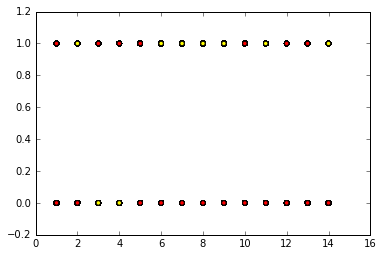

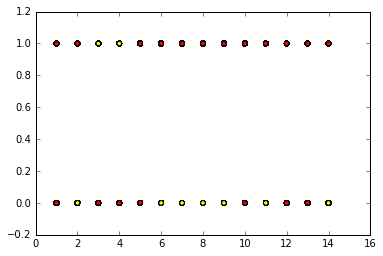

KeyboardInterrupt: 

In [53]:
# Plot every pair of x parameters with y

# We gotta change this so that every pair of features are plotted in subplots.

for i in [0,]:
    for j in []:
        if i!=j:
            #fig = plt.subplot(276,1,i+1)
            plt.xlabel(Xlabels[i])
            plt.ylabel(Xlabels[j])
            plt.scatter(X[:,i],X[:,j],c=Y,cmap='autumn')
            plt.show()

Logistic Regression

In [1]:
Y

NameError: name 'Y' is not defined

In [20]:
# Variations:
# Regularization (use L1 and L2)
# Polynomial transformation
# c values

#this is from the slides for logisitic regression
#clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
#clf.fit(trainX, trainY)
#yhat_test = clf.predict(testX)
#score = clf.score(testX, testY)

#helpful link for log reg: https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31\n",

#train test split:\n",
#preprocessing to scale the data and use train_test_split to split the data (70% train and 30% test)\n",

#x_train, x_test, y_train, y_test = train_test_split(x_scale, Y)
#print(x_train.shape)
#print(y_train.shape)

#this trains and predicts\n",
#logmodel = LogisticRegression()
#logmodel.fit(X_train,y_train)
#predictions = logmodel.predict(X_test)

#check precision, recall, f1-score using classification report\n",
#print(classification_report(y_test,predictions))

#another option found in hw5
#log reg with lasso(l1) regularization
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = []
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model 
# with different values of C.
def logreg_model(c , X_train, Y_train, X_test, Y_test,reg=None, max_iter=200):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1 \n",
    # means stronger regularization and large value means less regularization.\n",
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or\n",
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga
    #Create the Logistic Regression model object as described above and save it to logreg\n",
    
    if reg=="LASSO" or reg=="Lasso" or reg=="lasso" or reg=="l2" or reg==None:
        logreg = linear_model.LogisticRegression(C=c,penalty='l2', warm_start=True, solver='saga')
    elif reg=="Ridge" or reg=="ridge" or reg=="l1":
        logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')
    
    #Fit the model on the training set\n",
    logreg.fit(X_train, Y_train)
    
    #Find the prediction on training set\n",
    Yhat_train = logreg.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg\n",
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    #Find the prediction on test set\n",
    Yhat_test = logreg.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg\n",
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on tesr data = %f" % acc_test)
    # Appending value of c for graphing purposes\n",
    c_logreg.append(c)
    print(logreg.coef_)
    print(logreg.intercept_)

In [21]:
clist = [0.001,0.01,0.1,1,10,100]
print(type(trainY[0]))
for c in clist:
    logreg_model(c,trainX,trainY,testX,testY,'LASSO')

<class 'numpy.float64'>
Accuracy on training data = 0.618359
Accuracy on tesr data = 0.617347
[[ 0.02457421  0.04787359  0.02478385 -0.07802942 -0.00463184  0.10448074
   0.18672379  0.42429047  0.14133565 -0.009965   -0.05728957  0.01983124
  -0.0424602   0.04019429  0.11160241  0.11273499  0.01417475  0.00164264
   0.08692816  0.01232175 -0.01111959  0.07973741 -0.05221143  0.0068752 ]]
[-0.14606424]
Accuracy on training data = 0.619403
Accuracy on tesr data = 0.618104
[[ 0.02521293  0.05029322  0.02516267 -0.07942416 -0.0087509   0.10745618
   0.20648489  0.45815245  0.14583485 -0.00875623 -0.06254248  0.01877918
  -0.05370846  0.04313915  0.12411174  0.1657147   0.03149754  0.01144915
   0.13640276  0.01573877 -0.00765928  0.08431309 -0.05431293  0.00876223]]
[-0.14288796]


C:\Users\Rafi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.619488
Accuracy on tesr data = 0.618203
[[ 0.02532148  0.05055856  0.02521836 -0.07952571 -0.00922992  0.10772928
   0.20881813  0.46191617  0.14623581 -0.0085951  -0.06316941  0.01862642
  -0.05502206  0.04350095  0.12559018  0.17467947  0.03449284  0.01314725
   0.14481559  0.02623999  0.00288143  0.08481321 -0.054529    0.00898444]]
[-0.14253727]
Accuracy on training data = 0.619530
Accuracy on tesr data = 0.618137
[[ 0.02533314  0.05058535  0.02522427 -0.07953538 -0.00927858  0.1077562
   0.20905569  0.4622966   0.14627494 -0.00857845 -0.06323345  0.01861053
  -0.05515555  0.04353806  0.1257409   0.17564036  0.03481458  0.01332966
   0.14571777  0.02733445  0.00398047  0.08486374 -0.05455064  0.00900714]]
[-0.14250211]
Accuracy on training data = 0.619530
Accuracy on tesr data = 0.618137
[[ 0.02533432  0.05058804  0.02522487 -0.07953634 -0.00928346  0.10775888
   0.20907949  0.46233468  0.14627885 -0.00857679 -0.06323985  0.01860892
  -0.05516894  0.04

In [ ]:
print 

In [22]:
for c in clist:
    logreg_model(c,trainX,trainY,testX,testY,'Ridge')

Accuracy on training data = 0.615890
Accuracy on tesr data = 0.612311
[[ 0.          0.          0.         -0.01592623  0.          0.05545236
   0.08705064  0.40786189  0.11889343  0.          0.          0.          0.
   0.          0.04978564  0.          0.          0.          0.          0.
   0.          0.03715365 -0.00288116  0.        ]]
[-0.14947138]
Accuracy on training data = 0.619107
Accuracy on tesr data = 0.618071
[[ 0.02196725  0.04150307  0.01781696 -0.07575727  0.          0.10149556
   0.1949988   0.45762942  0.14390549 -0.00091226 -0.05043363  0.01689288
  -0.03716677  0.03102299  0.11131197  0.1023954   0.00490385  0.
   0.07618102  0.01833195  0.          0.075376   -0.0510457   0.        ]]
[-0.14295289]
Accuracy on training data = 0.619347
Accuracy on tesr data = 0.618005
[[ 0.02500565  0.04947833  0.02440109 -0.07933153 -0.00779074  0.10709344
   0.20763099  0.46183795  0.14597228 -0.00777158 -0.06197858  0.01843468
  -0.0534026   0.0422133   0.12426513  0.1

C:\Users\Rafi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.619530
Accuracy on tesr data = 0.618137
[[ 0.02533092  0.05057736  0.02521703 -0.07953375 -0.00926961  0.10775238
   0.2090673   0.46233367  0.1462764  -0.00856881 -0.0632275   0.01860685
  -0.05515338  0.04352947  0.12574257  0.17565847  0.03481554  0.01332737
   0.1457344   0.0405688   0.01721434  0.0848594  -0.05454962  0.00900074]]
[-0.14249869]
Accuracy on training data = 0.619530
Accuracy on tesr data = 0.618137
[[ 0.02533422  0.05058756  0.0252245  -0.07953598 -0.00928283  0.10775842
   0.20908057  0.4623381   0.14627906 -0.00857619 -0.0632387   0.01860821
  -0.05516942  0.04354145  0.12575586  0.1757306   0.0348444   0.01334628
   0.14580282  0.04305361  0.01970004  0.08486837 -0.05455276  0.00901036]]
[-0.14249842]


In [23]:
#Use different feature pairs
for c in clist:
    logreg_model(c,trainXpoly,trainY,testXpoly,testY,'LASSO')


C:\Users\Rafi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.584445
Accuracy on tesr data = 0.581501
[[ -5.03498418e-03   3.45875821e-03   7.58701009e-03   5.41896688e-03
   -5.61110810e-03   6.09878833e-03   8.91300662e-03   9.62218488e-03
    2.56856049e-02   1.43355453e-02  -3.80140413e-04  -3.04692592e-03
    2.95210211e-03   4.38230633e-03   6.18977982e-03   7.40519987e-03
    2.48919891e-03   2.08823249e-04   2.33486122e-04   5.76767200e-04
    2.08698610e-03  -2.07934791e-03   6.50548785e-03  -2.77498261e-03
   -1.18549411e-03  -1.08676648e-02  -5.79126917e-03  -4.53601206e-03
    1.14796129e-03  -3.90009680e-03  -2.32959812e-04  -5.36125953e-03
   -8.30337716e-03  -7.75662786e-03   2.48923401e-03   2.81301883e-03
    4.28634467e-04  -7.57300812e-04   1.83186116e-04   1.21247130e-03
   -1.18755790e-03   1.04174190e-03   1.06770422e-03   1.23698441e-05
   -2.58133409e-04   2.60465599e-04  -1.60450700e-03  -1.95020702e-03
    1.12891002e-03  -1.61940094e-03  -4.37512560e-03   2.82834328e-03
   -2.71700586e-03  

KeyboardInterrupt: 

In [13]:
for c in clist:
    logreg_model(c,trainXpoly,trainY,testXpoly,testY,'Ridge')

Accuracy on training data = 0.619793
Accuracy on tesr data = 0.616456
Accuracy on training data = 0.620801
Accuracy on tesr data = 0.617660
Accuracy on training data = 0.621018
Accuracy on tesr data = 0.617502


C:\Users\Rafi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Support Vector Machines

In [11]:
# Variations
# c value
# kernel
# polynomial transformation

acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [ ]:
#use svm_kernel parameter to choose svm model type. 3 kernel options: "linear"[default], "rbf", "poly"

def svm_model(c, X_train, Y_train, X_test, Y_test, svm_kernel = "linear"):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) - 5 points
    svc = svm.SVC(probability = False, kernel = svm_kernel, C = c)
    print("kernel: "+str(svm_kernel))
    print("c:{0:f}".format(c))
    
    #if svm_kernel=="poly": # Fill in the values for 
    #X_train=X_train[0:12500]
    #Y_train=Y_train[0:12500]
    #X_test=X_test[0:5300]
    #Y_test=Y_test[0:5300]
    
    # TODO - Fit the classifier on the training set - 5 points
    svc.fit(X_train, Y_train)
    
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    if svm_kernel=="linear":
        acc_train_svm_linear.append(acc_train)
    elif svm_kernel=="rbf":
        acc_train_svm_rbf.append(acc_train)
    elif svm_kernel=="poly":
        acc_train_svm_poly.append(acc_train)
        
    print('\tTrain Accuracy = '+str(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    print("ding1")
    Yhat_svc_test = svc.predict(X_test)
    print("ding2")
    acc_test = np.mean(Yhat_svc_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    if svm_kernel=="linear":
        acc_test_svm_linear.append(acc_test)
    elif svm_kernel=="rbf":
        acc_test_svm_rbf.append(acc_test)
    elif svm_kernel=="poly":
        acc_test_svm_poly.append(acc_train)
        
    print('\tTest Accuracy = '+str(acc_test))
    
    # Appending value of c for graphing purposes
    if svm_kernel=="linear":
        c_svm_linear.append(c)
    elif svm_kernel=="rbf":
        c_svm_rbf.append(c)
    elif svm_kernel=="poly":
        c_svm_poly.append(c)


In [17]:
print(acc_train_svm_linear)
print(acc_test_svm_linear)
print(c_svm_linear)

[]
[]
[]


In [16]:
clist=[0.001,0.01,0.1,1,10,100]
for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="linear");
    


kernel: linear
c:0.001000


KeyboardInterrupt: 

In [37]:
for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="rbf");

kernel: rbf
c:0.001000
	Train Accuracy = 0.5356
	Test Accuracy = 0.5344
kernel: rbf
c:0.010000
	Train Accuracy = 0.5356
	Test Accuracy = 0.5344
kernel: rbf
c:0.100000
	Train Accuracy = 0.6112
	Test Accuracy = 0.5952
kernel: rbf
c:1.000000
	Train Accuracy = 0.72
	Test Accuracy = 0.5924
kernel: rbf
c:10.000000
	Train Accuracy = 0.8576
	Test Accuracy = 0.5636
kernel: rbf
c:100.000000
	Train Accuracy = 0.9596
	Test Accuracy = 0.5312


In [25]:
acc_train_svm_rbf = [0.5356,0.5356,0.6112,0.72,0.8576,0.9596]
acc_test_svm_rbf = [0.5344,0.5344,0.5952,0.5924,0.5626,0.5312]
c_svm_rbf = [0.001,0.01,0.1,1.0,10.0,100.0]

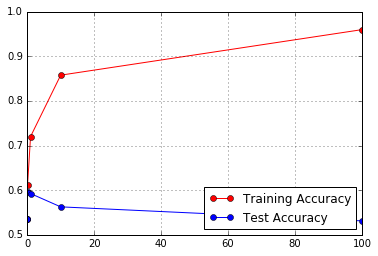

In [26]:
plt.plot(c_svm_rbf, acc_train_svm_rbf, 'ro-') 
plt.plot(c_svm_rbf, acc_test_svm_rbf,'bo-') 
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [32]:
for c in clist:
    svm_model(c,trainX,trainY,testX,testY,svm_kernel="poly")

kernel: poly
c:0.001000
	Train Accuracy = 0.54216
ding1
ding2
	Test Accuracy = 0.54679245283
kernel: poly
c:0.010000
	Train Accuracy = 0.5516
ding1
ding2
	Test Accuracy = 0.554905660377
kernel: poly
c:0.100000
	Train Accuracy = 0.60464
ding1
ding2
	Test Accuracy = 0.59320754717
kernel: poly
c:1.000000
	Train Accuracy = 0.66832
ding1
ding2
	Test Accuracy = 0.595660377358
kernel: poly
c:10.000000
	Train Accuracy = 0.69992
ding1
ding2
	Test Accuracy = 0.588113207547
kernel: poly
c:100.000000


KeyboardInterrupt: 

In [ ]:
for c in clist:
    svm_model(c,trainXpoly,trainY,testXpoly,testY,svm_kernel="rbf")

kernel: rbf
c:0.001000


In [27]:
acc_train_svm_poly = [0.546,0.5628,0.6072,0.7416,0.8884,0.976]
acc_test_svm_poly = [0.5248,0.534,0.5356,0.538,0.5292,0.5256]
c_svm_poly = [0.001,0.01,0.1,1.0,10.0,100.0]

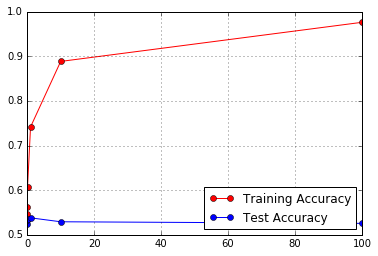

In [28]:
plt.plot(c_svm_poly, acc_train_svm_poly, 'ro-') 
plt.plot(c_svm_poly, acc_test_svm_poly,'bo-') 
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

Neural Networks

In [13]:
# Variations:
# hidden layers (use 1,2 and 3)
# hidden layer nodes (use 10,20 and 5)
# activation function (use sigmoid, ReLU, tanh)

def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

def f2(z):
    if z>0:
        return z
    else:
        return 0
    
def f2_deriv(z):
    if z>0:
        return 1
    else:
        return 0
    
def f3(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

def f3_deriv(z):
    return 1-(f3(z))^2

In [14]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

def feed_forward(x, W, b, act_func=1):
    a = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        node_in = a[l]
        #print("\n",W[l],"\n",node_in,"\n",b[l])
        z[l+1] = W[l].dot(node_in) + b[l]
        if act_func==1:
            a[l+1] = f(z[l+1])
        elif act_func == 2:
            a[l+1] = f2(z[l+1])
        elif act_func == 3:
            a[l+1] = f3(z[l+1])
        
    return a, z

def calculate_out_layer_delta(y, a_out, z_out,act_func=1):
    if act_func==1:
        return -(y-a_out) * f_deriv(z_out)
    elif act_func==2:
        return -(y-a_out) * f2_deriv(z_out)
    elif act_func==3:
        return -(y-a_out) * f3_deriv(z_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l, act_func=1):
    if act_func==1:
        return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)
    elif act_func==2:
        return np.dot(np.transpose(w_l), delta_plus_1) * f2_deriv(z_l)
    elif act_func==3:
        return np.dot(np.transpose(w_l), delta_plus_1) * f3_deriv(z_l)

def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25, act_func=1):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            a, z = feed_forward(X[i, :], W, b,act_func)
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l],act_func)
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l],act_func)
                    #print(type(tri_W))
                    tri_W[l] = tri_W[l] + np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                    tri_b[l] = tri_b[l] + delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] = W[l] + -alpha * (1.0/N * tri_W[l])
            b[l] = b[l] + -alpha * (1.0/N * tri_b[l])
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [15]:
nn_structure1 = [24, 10, 1]
nn_structure2 = [24, 20, 1]
nn_structure3 = [24, 5, 1]

nn_structure4 = [24, 10, 10, 1]
nn_structure5 = [24, 10, 10, 10, 1]

In [16]:
trainYvec=trainY.reshape((trainY.shape[0],1))
testYvec=testY.reshape((testY.shape[0],1))

In [17]:
print(X[0:20])

[[11.   1.  41.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   1.   0.   0.   0.   1.   0.   1.   0.   0. ]
 [12.   3.  59.   0.  18.   0.   0.   0.   9.   0.   0.   0.   3.   1.
   1.   1.   0.   0.   0.   1.   0.   1.   0.   0. ]
 [13.   2.  11.   5.  13.   2.   0.   1.   6.   0.   0.   2.   0.   0.
   1.   0.   0.   0.   1.   1.   0.   0.   0.   0. ]
 [14.   2.  44.   1.  16.   0.   0.   0.   7.   0.   0.   0.   3.   1.
   1.   1.   0.   0.   0.   0.   1.   0.   1.   0. ]
 [14.5  1.  51.   0.   8.   0.   0.   0.   5.   0.   0.   2.   2.   1.
   1.   1.   0.   0.   0.   0.   1.   0.   1.   0. ]
 [15.   3.  31.   6.  16.   0.   0.   0.   9.   0.   0.   0.   2.   0.
   1.   1.   0.   0.   0.   0.   1.   1.   0.   0. ]
 [15.5  4.  70.   1.  21.   0.   0.   0.   7.   0.   2.   0.   2.   1.
   1.   1.   0.   0.   0.   0.   1.   1.   0.   0. ]
 [16.   5.  73.   0.  12.   0.   0.   0.   8.   0.   0.   0.   0.   0.
   1.   1.   0.   0.   0.   0.   1.   1.   0.   0. ]
 [16.5 1

# v HERE!!!!

In [21]:
np.random.seed(0)
model_1=Sequential()
model_2=Sequential()
model_3=Sequential()
model_4=Sequential()
model_5=Sequential()
model_6=Sequential()
model_7=Sequential()

model_1.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='sigmoid'))
model_1.add(Dense(10,activation='sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

model_2.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='relu'))
model_2.add(Dense(10,activation='sigmoid'))
model_2.add(Dense(1,activation='sigmoid'))

model_3.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='tanh'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(1,activation='sigmoid'))

model_4.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='tanh'))
model_4.add(Dense(5,activation='sigmoid'))
model_4.add(Dense(1,activation='sigmoid'))
model_4.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

model_5.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='tanh'))
model_5.add(Dense(20,activation='sigmoid'))
model_5.add(Dense(1,activation='sigmoid'))
model_5.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

model_6.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='sigmoid'))
model_6.add(Dense(10,activation='sigmoid'))
model_6.add(Dense(10,activation='sigmoid'))
model_6.add(Dense(1,activation='sigmoid'))

model_7.add(Dense(len(trainX[0]),input_dim=len(trainX[0]),activation='sigmoid'))
model_7.add(Dense(10,activation='sigmoid'))
model_7.add(Dense(10,activation='sigmoid'))
model_7.add(Dense(10,activation='sigmoid'))
model_7.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model_1.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
history = model_1.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_1.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_1.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Epoch 1/1500
101266/101266 [==============================] - 2s 24us/step - loss: 0.2637 - acc: 0.4718
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2492 - acc: 0.5181
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2473 - acc: 0.5442
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2458 - acc: 0.5542
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2444 - acc: 0.5654
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2428 - acc: 0.5783
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2411 - acc: 0.5874
Epoch 8/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2393 - acc: 0.5954
Epoch 9/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2377 - acc: 0.6004
Epoch 10/1500
101266/101

101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6261
Epoch 78/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6262
Epoch 79/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6270
Epoch 80/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6268
Epoch 81/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6262
Epoch 82/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6269
Epoch 83/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6268
Epoch 84/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6276
Epoch 85/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6264
Epoch 86/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6275
Epoch 156/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6275
Epoch 157/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6275
Epoch 158/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6282
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6274
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6276
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6274
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6285
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6279
Epoch 164/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6285
Epoch 234/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6288
Epoch 235/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6288
Epoch 236/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6288
Epoch 237/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6287
Epoch 238/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6291
Epoch 239/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6289
Epoch 240/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6290
Epoch 241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6299
Epoch 242/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6298
Epoch 312/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6294
Epoch 313/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6295
Epoch 314/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6294
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6288
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6295
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6293
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6295
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6294
Epoch 320/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6294
Epoch 390/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6297
Epoch 391/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6297
Epoch 392/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6298
Epoch 393/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6302
Epoch 394/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6294
Epoch 395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6304
Epoch 396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6293
Epoch 397/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6296
Epoch 398/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6300
Epoch 467/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6310
Epoch 468/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6306
Epoch 469/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6294
Epoch 470/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6304
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6306
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6310
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6298
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6305
Epoch 475/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6304
Epoch 545/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6310
Epoch 546/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6301
Epoch 547/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6299
Epoch 548/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6304
Epoch 549/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6306
Epoch 550/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6305
Epoch 551/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6309
Epoch 552/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6303
Epoch 553/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6314
Epoch 622/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6305
Epoch 623/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6310
Epoch 624/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6308
Epoch 625/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6309
Epoch 626/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6301
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6301
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6309
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6306
Epoch 630/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6319
Epoch 700/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6312
Epoch 701/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6301
Epoch 702/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6306
Epoch 703/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6316
Epoch 704/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6312
Epoch 705/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6312
Epoch 706/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6315
Epoch 707/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6302
Epoch 708/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6311
Epoch 777/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6308
Epoch 778/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6316
Epoch 779/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6318
Epoch 780/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6316
Epoch 781/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6317
Epoch 782/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6319
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6315
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6313
Epoch 785/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6316
Epoch 854/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6316
Epoch 855/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6315
Epoch 856/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6310
Epoch 857/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6322
Epoch 858/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6315
Epoch 859/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6313
Epoch 860/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6320
Epoch 861/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6313
Epoch 862/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6308
Epoch 932/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6313
Epoch 933/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6318
Epoch 934/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6314
Epoch 935/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6311
Epoch 936/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321
Epoch 937/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6316
Epoch 938/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6318
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6326
Epoch 940/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6324
Epoch 1010/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318
Epoch 1011/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318
Epoch 1012/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6317
Epoch 1013/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6322
Epoch 1014/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318
Epoch 1015/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6324
Epoch 1016/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323
Epoch 1017/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6318
Epoch 1018/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6321
Epoch 1087/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6317
Epoch 1088/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6326
Epoch 1089/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6327
Epoch 1090/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6325
Epoch 1091/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6322
Epoch 1092/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323
Epoch 1093/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6324
Epoch 1094/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6322
Epoch 1095/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6321
Epoch 1164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6321
Epoch 1165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6316
Epoch 1166/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323
Epoch 1167/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319
Epoch 1168/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6321
Epoch 1169/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323
Epoch 1170/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6326
Epoch 1171/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6324
Epoch 1172/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6323
Epoch 1241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6317
Epoch 1242/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6318
Epoch 1243/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6322
Epoch 1244/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319
Epoch 1245/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6323
Epoch 1246/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 1247/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6327
Epoch 1248/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6318
Epoch 1249/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6332
Epoch 1318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6322
Epoch 1319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6318
Epoch 1320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326
Epoch 1321/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6318
Epoch 1322/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 1323/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6331
Epoch 1324/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6328
Epoch 1325/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6320
Epoch 1326/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325
Epoch 1395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326
Epoch 1396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326
Epoch 1397/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6317
Epoch 1398/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6333
Epoch 1399/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6330
Epoch 1400/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6330
Epoch 1401/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325
Epoch 1402/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6321
Epoch 1403/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6320
Epoch 1472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6328
Epoch 1473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6330
Epoch 1474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326
Epoch 1475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6325
Epoch 1476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6318
Epoch 1477/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6330
Epoch 1478/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6334
Epoch 1479/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6334
Epoch 1480/1500
101266/101266 [==============================]

In [23]:
model_2.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
history = model_2.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_2.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_2.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 2us/step - loss: 0.2475 - acc: 0.5397
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2453 - acc: 0.5545
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2441 - acc: 0.5700
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2431 - acc: 0.5811
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2422 - acc: 0.5881
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2412 - acc: 0.5938
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2399 - acc: 0.5961
Epoch 8/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2379 - acc: 0.6033
Epoch 9/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2363 - acc: 0.6058
Epoch 10/1500
101266/101266 [==============================] - 0s 1us/ste

101266/101266 [==============================] - 0s 1us/step - loss: 0.2276 - acc: 0.6251
Epoch 80/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6248
Epoch 81/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6241
Epoch 82/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6247
Epoch 83/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6240
Epoch 84/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6251
Epoch 85/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2276 - acc: 0.6239
Epoch 86/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2274 - acc: 0.6244
Epoch 87/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2275 - acc: 0.6250
Epoch 88/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6260
Epoch 158/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6265
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6266
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6258
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6263
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6262
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6266
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6265
Epoch 165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6261
Epoch 166/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6279
Epoch 235/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6271
Epoch 236/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6277
Epoch 237/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6270
Epoch 238/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6266
Epoch 239/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6283
Epoch 240/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2265 - acc: 0.6276
Epoch 241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6276
Epoch 242/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6278
Epoch 243/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6289
Epoch 313/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6277
Epoch 314/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6285
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6279
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6280
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6280
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6280
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6277
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6283
Epoch 321/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6283
Epoch 391/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6291
Epoch 392/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6284
Epoch 393/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6285
Epoch 394/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6283
Epoch 395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6289
Epoch 396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6290
Epoch 397/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6293
Epoch 398/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6288
Epoch 399/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6291
Epoch 469/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6293
Epoch 470/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6286
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6299
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6290
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6295
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6290
Epoch 475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6288
Epoch 476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6295
Epoch 477/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6295
Epoch 547/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6300
Epoch 548/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6299
Epoch 549/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6292
Epoch 550/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6292
Epoch 551/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6292
Epoch 552/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6296
Epoch 553/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6296
Epoch 554/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6297
Epoch 555/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6296
Epoch 625/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6298
Epoch 626/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6294
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6292
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6298
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6287
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6299
Epoch 631/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6296
Epoch 632/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6301
Epoch 633/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6299
Epoch 703/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6299
Epoch 704/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6301
Epoch 705/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6294
Epoch 706/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6303
Epoch 707/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6301
Epoch 708/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6297
Epoch 709/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6298
Epoch 710/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6299
Epoch 711/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6299
Epoch 781/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6300
Epoch 782/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6301
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6291
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6310
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6301
Epoch 786/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6304
Epoch 787/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6298
Epoch 788/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6299
Epoch 789/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6295
Epoch 859/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6300
Epoch 860/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6299
Epoch 861/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6291
Epoch 862/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6297
Epoch 863/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6300
Epoch 864/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6299
Epoch 865/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6301
Epoch 866/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6296
Epoch 867/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6303
Epoch 936/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6299
Epoch 937/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6304
Epoch 938/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6306
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6302
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6306
Epoch 941/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6315
Epoch 942/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6299
Epoch 943/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6299
Epoch 944/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6305
Epoch 1014/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6305
Epoch 1015/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6306
Epoch 1016/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6303
Epoch 1017/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6296
Epoch 1018/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6300
Epoch 1019/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6309
Epoch 1020/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6301
Epoch 1021/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6299
Epoch 1022/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6295
Epoch 1091/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6307
Epoch 1092/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6312
Epoch 1093/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6305
Epoch 1094/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6305
Epoch 1095/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6307
Epoch 1096/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6306
Epoch 1097/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6303
Epoch 1098/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6315
Epoch 1099/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6305
Epoch 1168/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6308
Epoch 1169/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6304
Epoch 1170/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6309
Epoch 1171/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6311
Epoch 1172/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6308
Epoch 1173/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6298
Epoch 1174/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6303
Epoch 1175/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6303
Epoch 1176/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6307
Epoch 1245/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6304
Epoch 1246/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6304
Epoch 1247/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6308
Epoch 1248/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6308
Epoch 1249/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6318
Epoch 1250/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6305
Epoch 1251/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6308
Epoch 1252/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6308
Epoch 1253/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6305
Epoch 1322/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6316
Epoch 1323/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6309
Epoch 1324/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6309
Epoch 1325/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6315
Epoch 1326/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6304
Epoch 1327/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6308
Epoch 1328/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6306
Epoch 1329/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6309
Epoch 1330/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6313
Epoch 1399/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6309
Epoch 1400/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6308
Epoch 1401/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6317
Epoch 1402/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6311
Epoch 1403/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6311
Epoch 1404/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6311
Epoch 1405/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6317
Epoch 1406/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6317
Epoch 1407/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6310
Epoch 1475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6313
Epoch 1476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6316
Epoch 1477/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6311
Epoch 1478/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6309
Epoch 1479/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6308
Epoch 1480/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6309
Epoch 1481/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6308
Epoch 1482/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6309
Epoch 1483/1500
101266/101266 [==============================]

In [25]:
model_3.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
history = model_3.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_3.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_3.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 2us/step - loss: 0.2239 - acc: 0.6316
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6324
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6326
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6321
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6321
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6324
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6322
Epoch 8/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6316
Epoch 9/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6323
Epoch 10/1500
101266/101266 [==============================] - 0s 1us/ste

101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6328
Epoch 80/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6324
Epoch 81/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6329
Epoch 82/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6327
Epoch 83/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6332
Epoch 84/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6324
Epoch 85/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6319
Epoch 86/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6318
Epoch 87/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6330
Epoch 88/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2235 - acc: 0.6331
Epoch 158/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2235 - acc: 0.6325
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2235 - acc: 0.6330
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6328
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2235 - acc: 0.6332
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2235 - acc: 0.6329
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6321
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2235 - acc: 0.6331
Epoch 165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2235 - acc: 0.6331
Epoch 166/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6335
Epoch 236/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6337
Epoch 237/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6331
Epoch 238/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2235 - acc: 0.6333
Epoch 239/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6335
Epoch 240/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6335
Epoch 241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2235 - acc: 0.6333
Epoch 242/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6337A: 0s - loss: 0.2236 - acc: 0.633
Epoch 243/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6335
Epoch 244/1500
101266/101266 [=======

101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6333
Epoch 313/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6331
Epoch 314/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6339
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6334
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6336
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6329
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6334
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6336
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6335
Epoch 321/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6340
Epoch 390/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6338
Epoch 391/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6333A: 0s - loss: 0.2233 - acc: 0.632
Epoch 392/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6342
Epoch 393/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6335
Epoch 394/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6330
Epoch 395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6331
Epoch 396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2234 - acc: 0.6334
Epoch 397/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6335
Epoch 398/1500
101266/101266 [=======

101266/101266 [==============================] - ETA: 0s - loss: 0.2231 - acc: 0.634 - 0s 1us/step - loss: 0.2232 - acc: 0.6339
Epoch 467/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6335
Epoch 468/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2231 - acc: 0.6336
Epoch 469/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2231 - acc: 0.6341
Epoch 470/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2233 - acc: 0.6337
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6343
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6333
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6337
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6343
Epoch 475/1500
101266/101266 [==

101266/101266 [==============================] - 0s 1us/step - loss: 0.2231 - acc: 0.6341
Epoch 544/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6342
Epoch 545/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6336
Epoch 546/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2231 - acc: 0.6345
Epoch 547/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2232 - acc: 0.6340
Epoch 548/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6339
Epoch 549/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2231 - acc: 0.6342
Epoch 550/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2231 - acc: 0.6343
Epoch 551/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2231 - acc: 0.6346
Epoch 552/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6346
Epoch 622/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2231 - acc: 0.6352
Epoch 623/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6346
Epoch 624/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6346
Epoch 625/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6342
Epoch 626/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2231 - acc: 0.6339
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2231 - acc: 0.6338
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6342
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6352
Epoch 630/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6344
Epoch 700/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6346
Epoch 701/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6345
Epoch 702/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6349
Epoch 703/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6348
Epoch 704/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6349
Epoch 705/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6352
Epoch 706/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6343
Epoch 707/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6342
Epoch 708/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6356
Epoch 777/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2230 - acc: 0.6353
Epoch 778/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6343
Epoch 779/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6347
Epoch 780/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6345
Epoch 781/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6345
Epoch 782/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6341
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6349
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6349
Epoch 785/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6349
Epoch 854/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6349
Epoch 855/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6348
Epoch 856/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6352
Epoch 857/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6357
Epoch 858/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6352
Epoch 859/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6354
Epoch 860/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6343
Epoch 861/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6351
Epoch 862/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6348
Epoch 932/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6349
Epoch 933/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6350
Epoch 934/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6348
Epoch 935/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6353
Epoch 936/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2229 - acc: 0.6348
Epoch 937/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6357
Epoch 938/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6344
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6352
Epoch 940/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6341
Epoch 1009/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6354
Epoch 1010/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6352
Epoch 1011/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6346
Epoch 1012/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2228 - acc: 0.6352A: 0s - loss: 0.2232 - acc: 0.635
Epoch 1013/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6353
Epoch 1014/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6348
Epoch 1015/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6350
Epoch 1016/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6344
Epoch 1017/1500
101266/101266

101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6349
Epoch 1085/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6357
Epoch 1086/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6352
Epoch 1087/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6349
Epoch 1088/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6349
Epoch 1089/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2227 - acc: 0.6349
Epoch 1090/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6357
Epoch 1091/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6345
Epoch 1092/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6347
Epoch 1093/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6349
Epoch 1161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6347
Epoch 1162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6355
Epoch 1163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6351
Epoch 1164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6351
Epoch 1165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6351
Epoch 1166/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6352
Epoch 1167/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6354
Epoch 1168/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6357
Epoch 1169/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6357
Epoch 1238/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6354
Epoch 1239/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6343
Epoch 1240/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2226 - acc: 0.6348
Epoch 1241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6353
Epoch 1242/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6348
Epoch 1243/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6345
Epoch 1244/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6344
Epoch 1245/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6356
Epoch 1246/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6353
Epoch 1315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6353
Epoch 1316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6349
Epoch 1317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6351
Epoch 1318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6351
Epoch 1319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6343
Epoch 1320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2225 - acc: 0.6349
Epoch 1321/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6350
Epoch 1322/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6348
Epoch 1323/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6353
Epoch 1392/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6357
Epoch 1393/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6349
Epoch 1394/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6354
Epoch 1395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6350
Epoch 1396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6346
Epoch 1397/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6351
Epoch 1398/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2223 - acc: 0.6356
Epoch 1399/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6352
Epoch 1400/1500
101266/101266 [==============================]

101266/101266 [==============================] - ETA: 0s - loss: 0.2222 - acc: 0.634 - 0s 1us/step - loss: 0.2224 - acc: 0.6351
Epoch 1469/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6349
Epoch 1470/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2224 - acc: 0.6353
Epoch 1471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2223 - acc: 0.6352
Epoch 1472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2223 - acc: 0.6355
Epoch 1473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2223 - acc: 0.6356
Epoch 1474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2223 - acc: 0.6350
Epoch 1475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2223 - acc: 0.6349
Epoch 1476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2223 - acc: 0.6346
Epoch 1477/1500
101266/1

In [26]:
model_4.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
history = model_4.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_4.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_4.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 2us/step - loss: 0.2498 - acc: 0.5240
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2456 - acc: 0.5656
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2427 - acc: 0.5840
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2405 - acc: 0.5944
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2386 - acc: 0.6010
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2366 - acc: 0.6064
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2345 - acc: 0.6108
Epoch 8/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2327 - acc: 0.6157
Epoch 9/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2315 - acc: 0.6177
Epoch 10/1500
101266/101266 [==============================] - 0s 1us/ste

101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6273
Epoch 80/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6267
Epoch 81/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6279
Epoch 82/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6274
Epoch 83/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6275
Epoch 84/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6274
Epoch 85/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6280
Epoch 86/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6272
Epoch 87/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6270
Epoch 88/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6289
Epoch 158/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6289
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6280
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6288
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6287
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6280
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6280
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6289
Epoch 165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6286
Epoch 166/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6300
Epoch 236/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6301
Epoch 237/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6302
Epoch 238/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6306
Epoch 239/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6299
Epoch 240/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6303
Epoch 241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6300
Epoch 242/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6302
Epoch 243/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6300
Epoch 244/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6299
Epoch 314/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6308
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6306
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6306
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6310
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6300
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6305
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6304
Epoch 321/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6308
Epoch 322/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6310
Epoch 391/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6312
Epoch 392/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6311
Epoch 393/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6308
Epoch 394/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6311
Epoch 395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6317
Epoch 396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6316
Epoch 397/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6306
Epoch 398/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6307
Epoch 399/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6310
Epoch 469/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6314
Epoch 470/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6319
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6311
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6320
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6316
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6316
Epoch 475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6316
Epoch 476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6319
Epoch 477/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6322
Epoch 547/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6314
Epoch 548/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6315
Epoch 549/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6313
Epoch 550/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6322
Epoch 551/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6318
Epoch 552/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6316
Epoch 553/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6311
Epoch 554/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6311
Epoch 555/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6320
Epoch 624/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6323
Epoch 625/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6319
Epoch 626/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6316
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6311
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6320
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318
Epoch 631/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6324
Epoch 632/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6314
Epoch 701/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321
Epoch 702/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319
Epoch 703/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6314
Epoch 704/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 705/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6322
Epoch 706/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 707/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6313
Epoch 708/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 709/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6327
Epoch 779/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323
Epoch 780/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6332
Epoch 781/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6317
Epoch 782/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6317
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6327
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 786/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6320
Epoch 787/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6323
Epoch 856/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6324
Epoch 857/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6332
Epoch 858/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6330
Epoch 859/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6328
Epoch 860/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6326
Epoch 861/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6321
Epoch 862/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6322
Epoch 863/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6323
Epoch 864/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6321
Epoch 933/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325
Epoch 934/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6324
Epoch 935/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6320
Epoch 936/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6329
Epoch 937/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326
Epoch 938/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326
Epoch 941/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6322
Epoch 1011/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6333
Epoch 1012/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6327
Epoch 1013/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6333
Epoch 1014/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6328
Epoch 1015/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6333
Epoch 1016/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6338
Epoch 1017/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6327
Epoch 1018/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6334
Epoch 1019/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6331
Epoch 1088/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6333
Epoch 1089/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6329
Epoch 1090/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6335
Epoch 1091/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6330
Epoch 1092/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6327
Epoch 1093/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6332
Epoch 1094/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6340
Epoch 1095/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6329
Epoch 1096/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6334
Epoch 1165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6339
Epoch 1166/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6341
Epoch 1167/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6336
Epoch 1168/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6335
Epoch 1169/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6340
Epoch 1170/1500
101266/101266 [==============================] - ETA: 0s - loss: 0.2236 - acc: 0.634 - 0s 1us/step - loss: 0.2240 - acc: 0.6333
Epoch 1171/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6339
Epoch 1172/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6331
Epoch 1173/1500
101266/1

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6335
Epoch 1241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6339
Epoch 1242/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6329
Epoch 1243/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6333
Epoch 1244/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6339
Epoch 1245/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6333
Epoch 1246/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6337
Epoch 1247/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6338
Epoch 1248/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6338
Epoch 1249/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6331
Epoch 1318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6337
Epoch 1319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6332
Epoch 1320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6336
Epoch 1321/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6334
Epoch 1322/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6336
Epoch 1323/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6333
Epoch 1324/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6339
Epoch 1325/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6339
Epoch 1326/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6328
Epoch 1395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6340
Epoch 1396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6326
Epoch 1397/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6346
Epoch 1398/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6334
Epoch 1399/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6338
Epoch 1400/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6335
Epoch 1401/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6339
Epoch 1402/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6340
Epoch 1403/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6335
Epoch 1472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6348
Epoch 1473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6339
Epoch 1474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6341
Epoch 1475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6332
Epoch 1476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6346
Epoch 1477/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6346
Epoch 1478/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6338
Epoch 1479/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6334
Epoch 1480/1500
101266/101266 [==============================]

In [27]:
model_5.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
history = model_5.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_5.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_5.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 2us/step - loss: 0.2472 - acc: 0.5471
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2441 - acc: 0.5666
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2419 - acc: 0.5793
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2396 - acc: 0.5898
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2374 - acc: 0.5961
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2355 - acc: 0.6019
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2340 - acc: 0.6061
Epoch 8/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2328 - acc: 0.6095
Epoch 9/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2319 - acc: 0.6124
Epoch 10/1500
101266/101266 [==============================] - 0s 1us/ste

101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6259
Epoch 80/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2271 - acc: 0.6254
Epoch 81/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6255
Epoch 82/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6258
Epoch 83/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6262
Epoch 84/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6262
Epoch 85/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6269
Epoch 86/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6264
Epoch 87/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6254
Epoch 88/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6283
Epoch 158/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6285
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2262 - acc: 0.6274
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6281
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6285
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6284
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6270
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6282
Epoch 165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6282
Epoch 166/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6295
Epoch 236/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6296
Epoch 237/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6302
Epoch 238/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6305
Epoch 239/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6292
Epoch 240/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6298
Epoch 241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6293
Epoch 242/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6297
Epoch 243/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6295
Epoch 244/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6309
Epoch 314/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6304
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6305
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6312
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6303
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6302
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6300
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6303
Epoch 321/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6293
Epoch 322/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6311
Epoch 391/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6310
Epoch 392/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6307
Epoch 393/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6305
Epoch 394/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6311
Epoch 395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6308
Epoch 396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6311
Epoch 397/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6306
Epoch 398/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6305
Epoch 399/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6311
Epoch 469/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6308
Epoch 470/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6320
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6307
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6323
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6313
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6306
Epoch 475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6313
Epoch 476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6306
Epoch 477/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6322
Epoch 547/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6313
Epoch 548/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6304
Epoch 549/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6319
Epoch 550/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6308
Epoch 551/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6310
Epoch 552/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6304
Epoch 553/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6311
Epoch 554/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6300
Epoch 555/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6316
Epoch 625/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6325
Epoch 626/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6325
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6319
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6311
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6307
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6310
Epoch 631/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6313
Epoch 632/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6309
Epoch 633/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6323
Epoch 703/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6322
Epoch 704/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6326
Epoch 705/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6315
Epoch 706/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6315
Epoch 707/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6314
Epoch 708/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6317
Epoch 709/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6320
Epoch 710/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6323
Epoch 711/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6319
Epoch 781/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6323
Epoch 782/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6327
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6321
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6318
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6320
Epoch 786/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6321
Epoch 787/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6320
Epoch 788/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6316
Epoch 789/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318
Epoch 859/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6317
Epoch 860/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6317
Epoch 861/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6317
Epoch 862/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321
Epoch 863/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6315
Epoch 864/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6317
Epoch 865/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6315
Epoch 866/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6319
Epoch 867/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6332
Epoch 937/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6318
Epoch 938/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6325
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6325
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6311
Epoch 941/1500
101266/101266 [==============================] - ETA: 0s - loss: 0.2244 - acc: 0.631 - 0s 1us/step - loss: 0.2243 - acc: 0.6326
Epoch 942/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318
Epoch 943/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318
Epoch 944/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6321
Epoch 945/1500
101266/101266 [==

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6326
Epoch 1014/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6324
Epoch 1015/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6326
Epoch 1016/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6317
Epoch 1017/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6322
Epoch 1018/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319
Epoch 1019/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 1020/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 1021/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6318
Epoch 1022/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6323
Epoch 1091/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6331
Epoch 1092/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6322
Epoch 1093/1500
101266/101266 [==============================] - ETA: 0s - loss: 0.2239 - acc: 0.633 - 0s 1us/step - loss: 0.2241 - acc: 0.6336
Epoch 1094/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325
Epoch 1095/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 1096/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6329
Epoch 1097/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6332
Epoch 1098/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326
Epoch 1099/1500
101266/1

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6335
Epoch 1167/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6324
Epoch 1168/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6329
Epoch 1169/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326
Epoch 1170/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6329
Epoch 1171/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6326
Epoch 1172/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6337
Epoch 1173/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6331
Epoch 1174/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6325
Epoch 1175/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6324
Epoch 1244/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6327
Epoch 1245/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6337
Epoch 1246/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6332
Epoch 1247/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6335
Epoch 1248/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6329
Epoch 1249/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6328
Epoch 1250/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6330
Epoch 1251/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6328A: 0s - loss: 0.2240 - acc: 0.632
Epoch 1252/1500
101266/101266

101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6332
Epoch 1321/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6330
Epoch 1322/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6326
Epoch 1323/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6327
Epoch 1324/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6331
Epoch 1325/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6333
Epoch 1326/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6329
Epoch 1327/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6329
Epoch 1328/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6343
Epoch 1329/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6331
Epoch 1398/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6337
Epoch 1399/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6323
Epoch 1400/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6330
Epoch 1401/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6327
Epoch 1402/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2239 - acc: 0.6324
Epoch 1403/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6329
Epoch 1404/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6334
Epoch 1405/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6332
Epoch 1406/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6336
Epoch 1475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2236 - acc: 0.6335
Epoch 1476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6338
Epoch 1477/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6333
Epoch 1478/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6331
Epoch 1479/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6342
Epoch 1480/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2237 - acc: 0.6339
Epoch 1481/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6337
Epoch 1482/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2238 - acc: 0.6338
Epoch 1483/1500
101266/101266 [==============================]

In [28]:
model_6.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
history = model_6.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_6.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_6.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2847 - acc: 0.4608
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2612 - acc: 0.4608
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2512 - acc: 0.4881
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2485 - acc: 0.5377
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2481 - acc: 0.5392
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2477 - acc: 0.5392
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2471 - acc: 0.5395
Epoch 8/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2464 - acc: 0.5435
Epoch 9/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2455 - acc: 0.5547
Epoch 10/1500
101266/101266 [==============================] - 0s 1us/ste

101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6262
Epoch 80/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2271 - acc: 0.6269
Epoch 81/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6265
Epoch 82/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6270
Epoch 83/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6261
Epoch 84/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6266
Epoch 85/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6267
Epoch 86/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6265
Epoch 87/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2271 - acc: 0.6267
Epoch 88/1500
101266/101266 [==============================] - 0s 1us/step - l

101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6280
Epoch 158/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6281
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6284
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6278
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2264 - acc: 0.6282
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6284
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6276
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6291
Epoch 165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2263 - acc: 0.6290
Epoch 166/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6290
Epoch 235/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6294
Epoch 236/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6291
Epoch 237/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6293
Epoch 238/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6288
Epoch 239/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6293
Epoch 240/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6280
Epoch 241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6288
Epoch 242/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2259 - acc: 0.6292
Epoch 243/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6291
Epoch 312/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6293
Epoch 313/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6296
Epoch 314/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6301
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6292
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6295
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6293
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6302
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6293
Epoch 320/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6297
Epoch 390/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6302
Epoch 391/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6301
Epoch 392/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6294
Epoch 393/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6298
Epoch 394/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6303
Epoch 395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6301
Epoch 396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6300
Epoch 397/1500
101266/101266 [==============================] - ETA: 0s - loss: 0.2254 - acc: 0.630 - 0s 1us/step - loss: 0.2254 - acc: 0.6302
Epoch 398/1500
101266/101266 [==

101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6299
Epoch 467/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6307
Epoch 468/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6310
Epoch 469/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6303
Epoch 470/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6301
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6303
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6307
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6311
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6301
Epoch 475/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6306
Epoch 545/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6313
Epoch 546/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6311
Epoch 547/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6305
Epoch 548/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6313
Epoch 549/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6313
Epoch 550/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6311
Epoch 551/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6306
Epoch 552/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6305
Epoch 553/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6310
Epoch 623/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6315
Epoch 624/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6309
Epoch 625/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6305
Epoch 626/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6315
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6305
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6320
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6310
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6310
Epoch 631/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6319
Epoch 700/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6322
Epoch 701/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6317
Epoch 702/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6312
Epoch 703/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6313
Epoch 704/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6317
Epoch 705/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6310
Epoch 706/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6298
Epoch 707/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6312
Epoch 708/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6308
Epoch 777/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6313
Epoch 778/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6319
Epoch 779/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6311
Epoch 780/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6314
Epoch 781/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6320
Epoch 782/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6316
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6323
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6324
Epoch 785/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6327
Epoch 854/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6322
Epoch 855/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6316
Epoch 856/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6322
Epoch 857/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6319
Epoch 858/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6307
Epoch 859/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6318
Epoch 860/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6316
Epoch 861/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6319
Epoch 862/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6317
Epoch 932/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6321
Epoch 933/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312
Epoch 934/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6331
Epoch 935/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6325
Epoch 936/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6316
Epoch 937/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6320
Epoch 938/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6319
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6313
Epoch 940/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6319
Epoch 1010/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323
Epoch 1011/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6315
Epoch 1012/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6327
Epoch 1013/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6324
Epoch 1014/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6320
Epoch 1015/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323
Epoch 1016/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6328
Epoch 1017/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6323
Epoch 1018/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323
Epoch 1087/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6324
Epoch 1088/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6334
Epoch 1089/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312
Epoch 1090/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6320
Epoch 1091/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6322
Epoch 1092/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323
Epoch 1093/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6318
Epoch 1094/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6320
Epoch 1095/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6324
Epoch 1164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6326
Epoch 1165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6328
Epoch 1166/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6322
Epoch 1167/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6327
Epoch 1168/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6331
Epoch 1169/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318
Epoch 1170/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6324
Epoch 1171/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6324
Epoch 1172/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6324
Epoch 1241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6333
Epoch 1242/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6329
Epoch 1243/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6330
Epoch 1244/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6328
Epoch 1245/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6327
Epoch 1246/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6331
Epoch 1247/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6314
Epoch 1248/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6327
Epoch 1249/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6331
Epoch 1318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6319
Epoch 1319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6327
Epoch 1320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6322
Epoch 1321/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319
Epoch 1322/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6333
Epoch 1323/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6324
Epoch 1324/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 1325/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6331
Epoch 1326/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6326
Epoch 1395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6328
Epoch 1396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2240 - acc: 0.6335
Epoch 1397/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6329
Epoch 1398/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6331
Epoch 1399/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 1400/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6324
Epoch 1401/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6329
Epoch 1402/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6321
Epoch 1403/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6332
Epoch 1472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6328
Epoch 1473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6330
Epoch 1474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6332
Epoch 1475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6337
Epoch 1476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6339
Epoch 1477/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6328
Epoch 1478/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6338
Epoch 1479/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6313
Epoch 1480/1500
101266/101266 [==============================]

In [29]:
model_7.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
history = model_7.fit(X, Y, epochs=1500, batch_size=4603)
scores = model_7.evaluate(X, Y)
print("\n%s: %.2f%%" % (model_7.metrics_names[1], scores[1]*100))

Epoch 1/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2555 - acc: 0.5392
Epoch 2/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2493 - acc: 0.5392
Epoch 3/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2484 - acc: 0.5392
Epoch 4/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2484 - acc: 0.5392
Epoch 5/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2483 - acc: 0.5392
Epoch 6/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2480 - acc: 0.5392
Epoch 7/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2477 - acc: 0.5392
Epoch 8/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2472 - acc: 0.5392
Epoch 9/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2465 - acc: 0.5392
Epoch 10/1500
101266/101266 [==============================] - 0s 1us/ste

101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6269
Epoch 80/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2270 - acc: 0.6268
Epoch 81/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6266
Epoch 82/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2269 - acc: 0.6280
Epoch 83/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6273
Epoch 84/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6269
Epoch 85/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6267
Epoch 86/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2268 - acc: 0.6272
Epoch 87/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2267 - acc: 0.6275
Epoch 88/1500
101266/101266 [==============================] - 0s 1us/step - l

Epoch 157/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6290
Epoch 158/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6288
Epoch 159/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6289
Epoch 160/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6289
Epoch 161/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6282
Epoch 162/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6293
Epoch 163/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6285
Epoch 164/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2260 - acc: 0.6288
Epoch 165/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2261 - acc: 0.6288
Epoch 166/1500
101266/101266 [=========================

101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6298
Epoch 235/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6296
Epoch 236/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6291
Epoch 237/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6290
Epoch 238/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6289
Epoch 239/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6287
Epoch 240/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6288
Epoch 241/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2258 - acc: 0.6292
Epoch 242/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6293
Epoch 243/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2257 - acc: 0.6277
Epoch 313/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6293
Epoch 314/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6292
Epoch 315/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6304
Epoch 316/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2256 - acc: 0.6296
Epoch 317/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6292
Epoch 318/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2255 - acc: 0.6297
Epoch 319/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6291
Epoch 320/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6302
Epoch 321/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6302
Epoch 391/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6309
Epoch 392/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2254 - acc: 0.6292
Epoch 393/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6308
Epoch 394/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6298
Epoch 395/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6305
Epoch 396/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6299
Epoch 397/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6300
Epoch 398/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6300
Epoch 399/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6307
Epoch 469/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6290
Epoch 470/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6301
Epoch 471/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2253 - acc: 0.6306
Epoch 472/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6297
Epoch 473/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6301
Epoch 474/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6292
Epoch 475/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6299
Epoch 476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6306
Epoch 477/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6310
Epoch 547/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6295
Epoch 548/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6311
Epoch 549/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6294
Epoch 550/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2252 - acc: 0.6306
Epoch 551/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6308
Epoch 552/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2251 - acc: 0.6300
Epoch 553/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6307
Epoch 554/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2250 - acc: 0.6311
Epoch 555/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6314
Epoch 624/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6313
Epoch 625/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6307
Epoch 626/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6311
Epoch 627/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6315
Epoch 628/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6304
Epoch 629/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6307
Epoch 630/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6306
Epoch 631/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6311
Epoch 632/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6312
Epoch 702/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6308
Epoch 703/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6309
Epoch 704/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6312
Epoch 705/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6307
Epoch 706/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6315
Epoch 707/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6314
Epoch 708/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6311
Epoch 709/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6306
Epoch 710/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6314
Epoch 780/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6313
Epoch 781/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6308
Epoch 782/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6311
Epoch 783/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6310
Epoch 784/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6314
Epoch 785/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2249 - acc: 0.6305
Epoch 786/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6316
Epoch 787/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6317
Epoch 788/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6306
Epoch 858/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6315
Epoch 859/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6310
Epoch 860/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2248 - acc: 0.6299
Epoch 861/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6310
Epoch 862/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6309
Epoch 863/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6311
Epoch 864/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6308
Epoch 865/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6319
Epoch 866/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6309
Epoch 936/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6309
Epoch 937/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6313
Epoch 938/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6314
Epoch 939/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6314
Epoch 940/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6318
Epoch 941/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6305
Epoch 942/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6314
Epoch 943/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6310
Epoch 944/1500
101266/101266 [==============================] - 0s 1us

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6315
Epoch 1014/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6301
Epoch 1015/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6319
Epoch 1016/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6308
Epoch 1017/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6304
Epoch 1018/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6314
Epoch 1019/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318
Epoch 1020/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2247 - acc: 0.6312
Epoch 1021/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6323
Epoch 1022/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6315
Epoch 1091/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6315
Epoch 1092/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6308
Epoch 1093/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6312
Epoch 1094/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6311
Epoch 1095/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6310
Epoch 1096/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6313
Epoch 1097/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6316
Epoch 1098/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2246 - acc: 0.6314
Epoch 1099/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6319
Epoch 1168/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6309
Epoch 1169/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6316
Epoch 1170/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312
Epoch 1171/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6316
Epoch 1172/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6321
Epoch 1173/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6315
Epoch 1174/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6313
Epoch 1175/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6322
Epoch 1176/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6317
Epoch 1245/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6318
Epoch 1246/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6316
Epoch 1247/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6311
Epoch 1248/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6317
Epoch 1249/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6315
Epoch 1250/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6308
Epoch 1251/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6317
Epoch 1252/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2245 - acc: 0.6312
Epoch 1253/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6311
Epoch 1322/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6319
Epoch 1323/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6326
Epoch 1324/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 1325/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6317
Epoch 1326/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 1327/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6319
Epoch 1328/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 1329/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6321
Epoch 1330/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6318
Epoch 1399/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6318
Epoch 1400/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6322
Epoch 1401/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6321
Epoch 1402/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6325
Epoch 1403/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2244 - acc: 0.6315
Epoch 1404/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6318
Epoch 1405/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 1406/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6322
Epoch 1407/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6318
Epoch 1476/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6310
Epoch 1477/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6314
Epoch 1478/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6316A: 0s - loss: 0.2244 - acc: 0.631
Epoch 1479/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 1480/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2241 - acc: 0.6318
Epoch 1481/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 1482/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2242 - acc: 0.6325
Epoch 1483/1500
101266/101266 [==============================] - 0s 1us/step - loss: 0.2243 - acc: 0.6320
Epoch 1484/1500
101266/101266

# ^ UNTIL HERE!!! (set epochs and batch size)

In [46]:
W_1, b_1, avg_cost_func_1 = train_nn(nn_structure1, trainX, trainYvec, 3000,act_func=1)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000


KeyboardInterrupt: 

In [ ]:
W_2, b_2, avg_cost_func_2 = train_nn(nn_structure1, trainX, trainYvec, 3000,act_func=2)

In [ ]:
W_3, b_3, avg_cost_func_3 = train_nn(nn_structure1, trainX, trainYvec, 3000,act_func=3)

In [ ]:
W_4, b_4, avg_cost_func_4 = train_nn(nn_structure2, trainX, trainYvec, 3000,act_func=1)

In [ ]:
W_5, b_5, avg_cost_func_5 = train_nn(nn_structure3, trainX, trainYvec, 3000,act_func=1)

In [ ]:
W_6, b_6, avg_cost_func_6 = train_nn(nn_structure4, trainX, trainYvec, 3000,act_func=1)

In [ ]:
W_7, b_7, avg_cost_func_7 = train_nn(nn_structure5, trainX, trainYvec, 3000,act_func=1)

In [ ]:
plt.plot(avg_cost_func_1)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_1, b_1, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_2)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_2, b_2, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_3)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_3, b_3, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_4)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_4, b_4, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_5)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_5, b_5, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_6)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_6, b_6, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))

In [ ]:
plt.plot(avg_cost_func_7)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

predY = predict_y(W_7, b_7, testX, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(testYvec, predY) * 100))